# Data 102 Final Project 
<b>Authors: Aileen Peralta, Carlos Ortiz, Isabel Zavian, Razi Mahmood</b>

</br>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly
import plotly.express as px

import matplotlib.pyplot as plt
%matplotlib inline

import itertools
import hashlib

sns.set(style="dark")
plt.style.use("ggplot")

import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

In [ ]:
pip install nbmerge

## EDA Code

In [ ]:
df_pm = pd.read_csv("smaller_PM2.5.csv")
df_pm = df_pm.drop(columns="Unnamed: 0")
df_pm_ca = df_pm[df_pm['statefips'] == 6]

In [ ]:
df_pm_ca

,year,date,statefips,countyfips,ctfips,latitude,longitude,ds_pm_pred,ds_pm_stdd
0,2011,27NOV2011,6,6037,6037502500,33.97726,-118.11006,8.157600,2.777932
10,2011,12FEB2011,6,6007,6007000201,39.77527,-121.86371,13.518897,4.334973
13,2011,01MAR2011,6,6083,6083000804,34.41955,-119.67620,7.074712,2.530103
20,2011,10JUN2011,6,6073,6073011601,32.66633,-117.09643,8.276892,2.569860
23,2011,07MAR2011,6,6037,6037214901,34.07430,-118.38721,3.480751,1.230395
...,...,...,...,...,...,...,...,...,...
1999942,2014,28OCT2014,6,6007,6007000103,39.76816,-121.81838,7.743300,3.877400
1999952,2014,04JAN2014,6,6073,6073007701,32.78841,-117.24016,26.197100,15.342900
1999968,2014,03MAY2014,6,6059,6059087001,33.82488,-117.98029,15.643100,9.373500
1999976,2014,15OCT2014,6,6001,6001421200,37.89736,-122.27469,7.070500,3.815700


In [ ]:
df_pm_la = df_pm_ca[df_pm_ca['countyfips'] == 6037]
df_pm_alameda = df_pm_ca[df_pm_ca['countyfips'] == 6001]

### Countplot for PM 2.5:

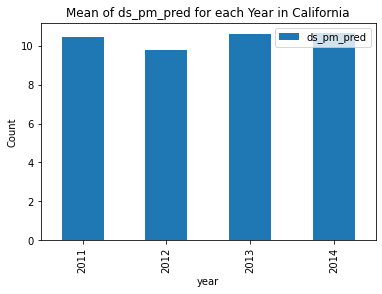

In [ ]:
df_pm_ca.groupby('year').agg({'ds_pm_pred': np.mean}).plot.bar()
plt.title('Mean of ds_pm_pred for each Year in California');
plt.ylabel('Count');
#Mean estimated 24-hour average PM2.5 concentration in μg/m3

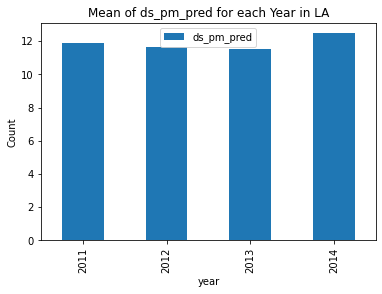

In [ ]:
df_pm_la.groupby('year').agg({'ds_pm_pred': np.mean}).plot.bar()
plt.title('Mean of ds_pm_pred for each Year in LA');
plt.ylabel('Count');

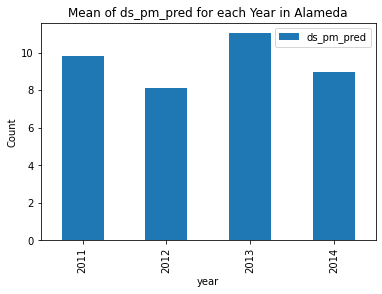

In [ ]:
df_pm_alameda.groupby('year').agg({'ds_pm_pred': np.mean}).plot.bar()
plt.title('Mean of ds_pm_pred for each Year in Alameda');
plt.ylabel('Count');

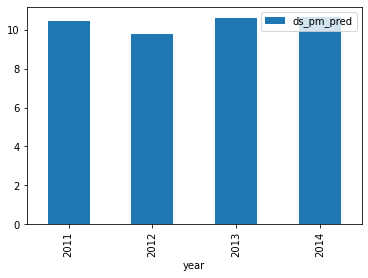

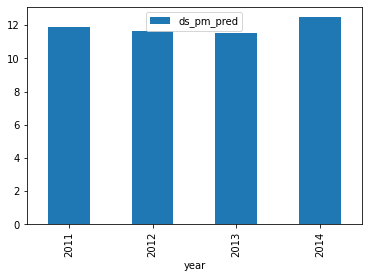

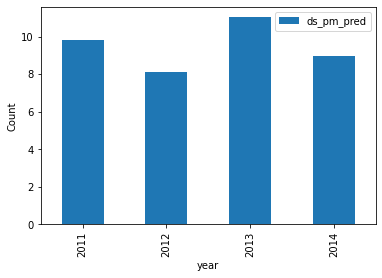

In [ ]:
df_pm_ca.groupby('year').agg({'ds_pm_pred': np.mean}).plot.bar()
df_pm_la.groupby('year').agg({'ds_pm_pred': np.mean}).plot.bar()
df_pm_alameda.groupby('year').agg({'ds_pm_pred': np.mean}).plot.bar()

plt.ylabel('Count');


In [ ]:
asthma = pd.read_csv('U.S._Chronic_Disease_Indicators__Asthma.csv', low_memory=False)
tobacco = pd.read_csv('U.S._Chronic_Disease_Indicators__Tobacco.csv', low_memory=False)

In [ ]:
asthma['Question'].unique()

array(['Asthma mortality rate',
       'Emergency department visit rate for asthma',
       'Hospitalizations for asthma',
       'Current asthma prevalence among adults aged >= 18 years',
       'Asthma prevalence among women aged 18-44 years',
       'Influenza vaccination among noninstitutionalized adults aged 18-64 years with asthma',
       'Influenza vaccination among noninstitutionalized adults aged >= 65 years with asthma',
       'Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years with asthma',
       'Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years with asthma'],
      dtype=object)

In [ ]:
tobacco['Question'].unique()

array(['Quit attempts in the past year among current smokers',
       'Current cigarette smoking among youth',
       'Current smokeless tobacco use among youth',
       'Current smoking among adults aged >= 18 years',
       'Current cigarette smoking among women aged 18-44 years',
       'Proportion of the population protected by a comprehensive smoke-free policy prohibiting smoking in all indoor areas of workplaces and public places, including restaurants and bars',
       'Secondary schools that have a comprehensive tobacco-free school policy in place',
       'Cigarette smoking before pregnancy',
       'Amount of tobacco product excise tax', 'Sale of cigarette packs',
       'States that allow stronger local tobacco control and prevention laws',
       'States with strong polices that require retail licenses to sell tobacco products',
       'Percent tobacco revenue to fund at CDC recommended level',
       'Pneumococcal vaccination among noninstitutionalized adults aged 18-64 ye

In [ ]:
asthma_q = 'Current asthma prevalence among adults aged >= 18 years'
tobacco_q = 'Current smoking among adults aged >= 18 years'

asthma_all_q = asthma[asthma['Question'] == asthma_q]
tobacco_all_q = tobacco[tobacco['Question'] == tobacco_q]

**Choropleth maps for Asthma and Tobacco**

In [ ]:
asthma_q_state = asthma_all_q.groupby('LocationAbbr').agg({'DataValueAlt': np.mean}).reset_index()

In [ ]:
fig = px.choropleth(asthma_q_state, locations="LocationAbbr",locationmode="USA-states", color='DataValueAlt', scope="usa", title="Cloropleth Plot of Asthma Percentages in Each State")
fig.show()

In [ ]:
tobacco_q_state = tobacco_all_q.groupby('LocationAbbr').agg({'DataValueAlt': np.mean}).reset_index()

In [ ]:
fig = px.choropleth(tobacco_q_state, locations="LocationAbbr",locationmode="USA-states", color='DataValueAlt', scope="usa", title="Cloropleth Plot of Tobacco Percentages in Each State")
fig.show()

In [ ]:
# Correlation between Asthma and Tobacco

asthma_q_state.corrwith(tobacco_q_state)

DataValueAlt    0.275491
dtype: float64

**Distributions by Category for Asthma**

In [ ]:
asthma_ca = asthma[asthma['LocationAbbr'] == 'CA']
asthma_ca_q = asthma_ca[asthma_ca['Question'] == asthma_q]

**Race**

In [ ]:
asthma_ca_q['StratificationCategory1'] = asthma_ca_q['StratificationCategory1'].astype(str)
asthma_ca_q_race = asthma_ca_q[asthma_ca_q['StratificationCategory1'] == 'Race/Ethnicity']

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
asthma_ca_q_race['Stratification1'].value_counts()
asthma_ca_q_race_hisp = asthma_ca_q_race[asthma_ca_q_race['Stratification1'] == 'Hispanic']
asthma_ca_q_race_white = asthma_ca_q_race[asthma_ca_q_race['Stratification1'] == 'White, non-Hispanic']

Text(0.5, 1.0, 'Prevelance of Asthma Across Hispanic and Whites in California for Adults >= 18 years')

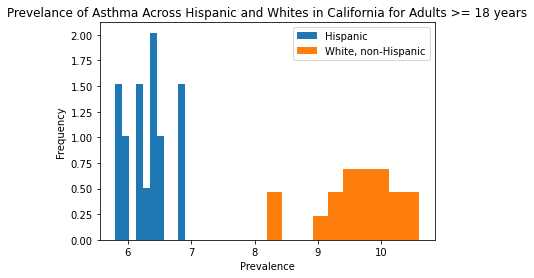

In [ ]:
plt.hist(asthma_ca_q_race_hisp['DataValueAlt'], density = True, label = 'Hispanic')
plt.hist(asthma_ca_q_race_white['DataValueAlt'], density = True, label = 'White, non-Hispanic')
plt.legend()
plt.xlabel('Prevalence')
plt.ylabel('Frequency')
plt.title('Prevelance of Asthma Across Hispanic and Whites in California for Adults >= 18 years')

**Gender**

In [ ]:
asthma_ca_q_gender = asthma_ca_q[asthma_ca_q['StratificationCategory1'] == 'Gender']
asthma_ca_q_gender_male =  asthma_ca_q_gender[asthma_ca_q_gender['Stratification1']== 'Male']
asthma_ca_q_gender_female = asthma_ca_q_gender[asthma_ca_q_gender['Stratification1']== 'Female']

Text(0.5, 1.0, 'Prevelance of Asthma Across Male and Female in California for Adults >= 18 years')

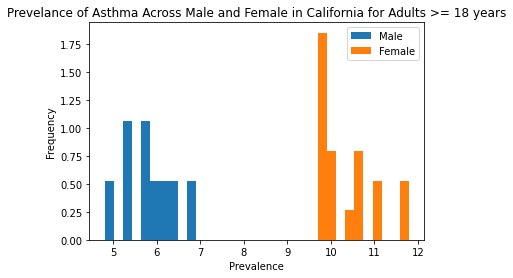

In [ ]:
plt.hist(asthma_ca_q_gender_male['DataValueAlt'], density = True, label = 'Male')
plt.hist(asthma_ca_q_gender_female['DataValueAlt'], density = True, label = 'Female')
plt.legend()
plt.xlabel('Prevalence')
plt.ylabel('Frequency')
plt.title('Prevelance of Asthma Across Male and Female in California for Adults >= 18 years')

**Scatterplot across Mean and SD of PM2.5 concentrations**

In [ ]:
df_pm = pd.read_csv("smaller_PM2.5.csv")
df_pm = df_pm.drop(columns="Unnamed: 0")
df_pm['date'] = df_pm['date'].astype(str)
df_pm['day'] = df_pm['date'].str[:2]
df_pm['month'] = df_pm['date'].str[2:5]

df_pm

,year,date,statefips,countyfips,ctfips,latitude,longitude,ds_pm_pred,ds_pm_stdd,day,month
0,2011,27NOV2011,6,6037,6037502500,33.97726,-118.11006,8.157600,2.777932,27,NOV
1,2011,21AUG2011,12,12086,12086009036,25.83332,-80.37867,9.408597,2.126664,21,AUG
2,2011,01JAN2011,45,45045,45045002804,34.86177,-82.30892,22.934197,5.545795,01,JAN
3,2011,03JUL2011,49,49035,49035101800,40.75523,-111.86679,11.379322,2.161727,03,JUL
4,2011,16SEP2011,48,48039,48039663900,29.01409,-95.40389,12.972203,3.744467,16,SEP
...,...,...,...,...,...,...,...,...,...,...,...
1999995,2014,14DEC2014,42,42003,42003515300,40.41770,-79.89212,20.069700,7.327100,14,DEC
1999996,2014,03APR2014,44,44007,44007015300,41.89012,-71.37593,8.186200,3.164800,03,APR
1999997,2014,02SEP2014,20,20209,20209043000,39.07667,-94.61347,9.247300,2.422000,02,SEP
1999998,2014,27MAR2014,36,36047,36047012000,40.63277,-74.01174,9.095100,2.349800,27,MAR


In [ ]:
data_2011 = df_pm[df_pm['year']== 2011]
data_2012 = df_pm[df_pm['year']== 2012]
data_2013 = df_pm[df_pm['year']== 2013]
data_2014 = df_pm[df_pm['year']== 2014]

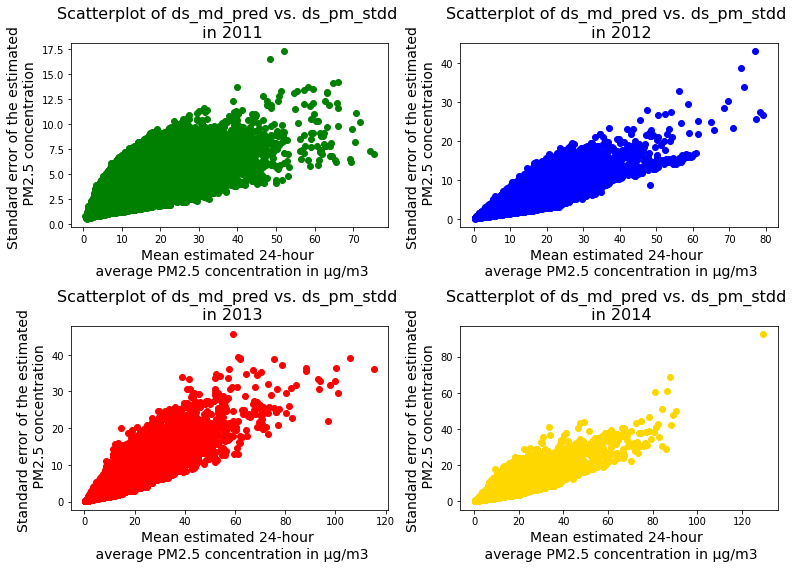

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(11,8))
axes[0, 0].scatter(x='ds_pm_pred', y='ds_pm_stdd', data=data_2011, color="green")
axes[0, 0].set_title('Scatterplot of ds_md_pred vs. ds_pm_stdd \n in 2011', fontsize=16)

axes[0, 1].scatter(x='ds_pm_pred', y='ds_pm_stdd', data=data_2012, color="blue")
axes[0, 1].set_title('Scatterplot of ds_md_pred vs. ds_pm_stdd \n in 2012', fontsize=16)

axes[1, 0].scatter(x='ds_pm_pred', y='ds_pm_stdd', data=data_2013, color="red")
axes[1, 0].set_title('Scatterplot of ds_md_pred vs. ds_pm_stdd \n in 2013', fontsize=16)

axes[1, 1].scatter(x='ds_pm_pred', y='ds_pm_stdd', data=data_2014, color="gold")
axes[1, 1].set_title('Scatterplot of ds_md_pred vs. ds_pm_stdd \n in 2014', fontsize=16)

for ax in axes.flat:
    #x-axis: Mean estimated 24-hour average PM2.5 concentration in μg/m3
    #y-axis: Standard error of the estimated PM2.5 concentration
    ax.set_xlabel('Mean estimated 24-hour \n average PM2.5 concentration in μg/m3', fontsize=14)
    ax.set_ylabel('Standard error of the estimated \n PM2.5 concentration', fontsize=14)
    
plt.tight_layout()

## EDA Discussion

Our focus for preliminary EDA was to look into CDC’s state-specific indicator data as we are examining the relationship between Asthma and PM2.5 in our causal inference and hypothesis testing research questions. 

For data cleaning, we first examined what the indicator dataset captures, then filtered the data to prevalence among adults aged 18 and older. We had to consider how the data comes from different sources, is aggregated by year and state, and has different units the values are measured in. We averaged across the sources, sorted by year and state, and focused on percentage for the values to remain inline with prevalence. For example, we grouped by state using an aggregate function to take the mean of the DataValueAlt feature.

For our causal inference question, we are looking into whether higher levels of PM2.5 cause higher levels of asthma. There are possible confounding variables, so our EDA for this consists of two quantitative choropleth maps—one for the asthma indicator and another for the tobacco indicator by the granularity of the state. It is possible that tobacco use could have a impact on asthma levels for our research question, so we are trying to look at the relationship between both. Visually, we don’t see much correlation between the two, so to quantify this, we calculated the correlation between the two. We got a correlation of -0.17 which is fairly weak, so we find that possible confounding factors such as tobacco use won’t have a significant influence in our research study. 

In order to look at the research question focused on race, we filtered the dataset where the Stratification Category was analyzing for Race and for Gender. For the filtered race dataset, we filtered again on two races: white and hispanic. For the filtered gender dataset, we filtered again on male and female. These findings would impact our model and inferences because it could give insight on whether race and gender are frequently affected in different capacities of prevalence. 

For the qualitative variables, one of the major visuals involved using a histogram to see the distribution of the prevalence of adult individuals who had asthma with respect to race and gender. In both the gender and race plots, both of the distributions appeared separate from each other without any overlap. In the race histogram, the Hispanic distribution ranged from roughly 5 to 7% with the White, non-Hispanic distribution ranging from roughly 8 to 11%. The gender plot had a slightly similar range with the male prevalence between 5 to 7% and female prevalence between 10 to 12%.

We also plotted multiple scatterplots to identify the relationship between the mean estimated 24 hour average of the PM 2.5 concentration and the standard deviation of the PM 2.5 concentration for each year between 2011-2014. The PM 2.5 concentration data from 2011 had a smaller range of values for the standard deviation from 0 to about 20, the data from 2012 and 2013 both had a range of about 0 to 40, the data from 2014 had a larger range of about 0 to 90. All of the datasets had denser points for the mean estimated 24 hour average of the PM 2.5 concentration from a range of 0 to 80. However, the 2013 and 2014 data had a couple of extra points or outliers that increased this range to about 120, which could account for the fact that the data was shuffled and sampled from the original dataset. By identifying each of these scatterplots, we can see a slight positive correlation between both variables of the mean estimated 24 hour average of the PM 2.5 concentration and the standard deviation of the PM 2.5 concentration.


# Hypothesis Testing

In [ ]:
asthma = pd.read_csv("U.S._Chronic_Disease_Indicators__Asthma.csv")
asthma_df = asthma[asthma['Question'] == 'Current asthma prevalence among adults aged >= 18 years']

In [ ]:
asthma_df

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
19,2017,2017,IA,Iowa,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Crude Prevalence,...,19,AST,AST1_1,CRDPREV,GENDER,GENF,NaN,NaN,NaN,NaN
20,2016,2016,MO,Missouri,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Crude Prevalence,...,29,AST,AST1_1,CRDPREV,GENDER,GENM,NaN,NaN,NaN,NaN
22648,2018,2018,AZ,Arizona,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Crude Prevalence,...,4,AST,AST1_1,CRDPREV,GENDER,GENF,NaN,NaN,NaN,NaN
22649,2014,2014,AR,Arkansas,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Crude Prevalence,...,5,AST,AST1_1,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
22650,2013,2013,CO,Colorado,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Crude Prevalence,...,8,AST,AST1_1,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37543,2016,2016,NM,New Mexico,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Crude Prevalence,...,35,AST,AST1_1,CRDPREV,RACE,WHT,NaN,NaN,NaN,NaN
37544,2011,2011,RI,Rhode Island,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Age-adjusted Prevalence,...,44,AST,AST1_1,AGEADJPREV,RACE,MRC,NaN,NaN,NaN,NaN
37547,2019,2019,ID,Idaho,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Age-adjusted Prevalence,...,16,AST,AST1_1,AGEADJPREV,GENDER,GENM,NaN,NaN,NaN,NaN
37550,2014,2014,MO,Missouri,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Crude Prevalence,...,29,AST,AST1_1,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN


In [ ]:
asthma_df['StratificationCategory1'].unique()

array(['Gender', 'Overall', 'Race/Ethnicity'], dtype=object)

In [ ]:
asthma_df['Stratification1'].unique()

array(['Female', 'Male', 'Overall', 'Black, non-Hispanic',
       'Other, non-Hispanic', 'White, non-Hispanic', 'Hispanic',
       'Multiracial, non-Hispanic'], dtype=object)

In [ ]:
df_pm = pd.read_csv("smaller_PM2.5.csv").drop(columns="Unnamed: 0")

In [ ]:
df_pm.columns

Index(['year', 'date', 'statefips', 'countyfips', 'ctfips', 'latitude',
       'longitude', 'ds_pm_pred', 'ds_pm_stdd'],
      dtype='object')

1. Is there a difference in U.S. states' asthma rates from 2011 to 2014?
2. Is there a difference in U.S. states' asthma rates across males and females?
3. Is there a difference in U.S. states' asthma rates across White, Non-Hispanic and Hispanic?
4. Is there a difference in county 24-hr average PM2.5 rates across LA County and Alameda County?
5. Is there a difference in state 24-hr average PM2.5 rates across California and Texas?

We use data from 2014 for all questions, except question 1 also includes 2011 data. 

Three hypothesis tests explore asthma prevalence in the U.S. across three different scales (i.e., time, gender, race/ethnicity). We do this because we want to get an understanding of how different stratifications could provide different results, in addition to the fact that there are varying levels of data across each due to how it is recorded by each state. For example, there are issues of inequity at play, largely through race/ethnicity. Some people might have less access to healthcare, so it is possible that they are being undercountded, or not counted at all. 

Two hypothesis tests explore 24-hr average PM2.5 rates across two different scales (i.e., county-level, state-level). We do this because we want to get an understand of how different scopes provide different results. 

### Methods

#### Q1: Is there a difference in U.S. states' asthma rates from 2011 to 2014?

Null: There is no significant difference in U.S. states’ asthma prevalence between 2011 and 2014. Any difference is due to chance.

Alternative: There is a significant difference in U.S. states’ asthma prevalence between 2011 and 2014.


In [ ]:
q1_asthma_all = asthma_df[asthma_df['StratificationCategory1'] == 'Overall'] # Filtering for overall stratification categories
q1_asthma_all = q1_asthma_all[q1_asthma_all['DataValueType'] == "Crude Prevalence"] # Filtering for crude prevalence
q1_asthma_all = q1_asthma_all[(q1_asthma_all['YearStart'] == 2011) | (q1_asthma_all['YearStart'] == 2014)]
q1_asthma_ab = q1_asthma_all[['YearStart', 'DataValue']]

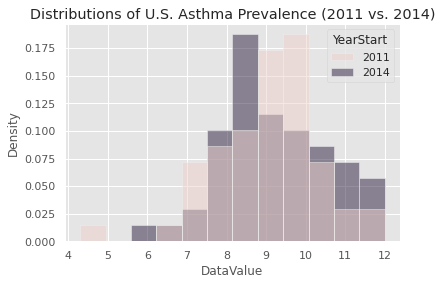

In [ ]:
sns.histplot(data=q1_asthma_ab, x='DataValue', hue='YearStart', stat='density') # represents 2011 and 2014 distributions of asthma
plt.title("Distributions of U.S. Asthma Prevalence (2011 vs. 2014)");

In [ ]:
observed_grouped = list(q1_asthma_ab.groupby(['YearStart']).mean()['DataValue'])

observed_statistic = observed_grouped[1] - observed_grouped[0]

In [ ]:
def q1_statistic():
    tbl = q1_asthma_ab.copy()
    shuffled = q1_asthma_ab.sample(n=len(tbl['DataValue']), replace=False) #resample the data
    
    tbl['YearStart'] = np.array(list(shuffled['YearStart'])) #shuffled year label

    grouped = list(tbl.groupby(["YearStart"]).mean()['DataValue']) # gets the mean of the shuffled years

    return grouped[1] - grouped[0] # Asthma prevalence of 2014 - 2011

In [ ]:
iterations = 1000

stats = np.array([])

for i in np.arange(iterations):
    sample = q1_statistic()
    stats = np.append(stats, sample)

In [ ]:
p_value = np.count_nonzero(stats >= observed_statistic) / len(stats)

In [ ]:
p_value

0.19

#### Q2: Is there a difference in U.S. states' asthma rates across males and females?
Null: There is no significant difference in U.S. states’ asthma prevalence between males and females. Any difference is due to chance.

Alternative: There is a significant difference in U.S. states’ asthma prevalence between males and females.



In [ ]:
q2_asthma_gender = asthma_df[asthma_df['StratificationCategory1'] == 'Gender'] # Filter by gender
q2_asthma_gender = q2_asthma_gender[q2_asthma_gender['DataValueType'] == "Crude Prevalence"] # Filtering for crude prevalence
q2_asthma_gender = q2_asthma_gender[(q2_asthma_gender['YearStart'] == 2014)] # Take 2014 data
q2_asthma_ab = q2_asthma_gender[['Stratification1', 'DataValue']]

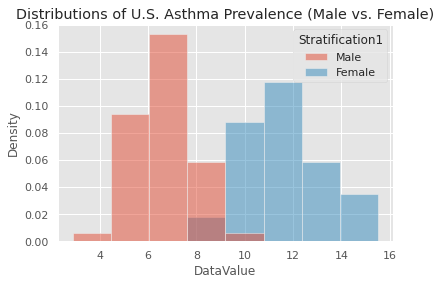

In [ ]:
sns.histplot(data=q2_asthma_ab, x='DataValue', hue='Stratification1', stat='density') # represents 2011 and 2014 distributions of asthma 
plt.title("Distributions of U.S. Asthma Prevalence (Male vs. Female)");

In [ ]:
q2_observed_grouped = list(q2_asthma_ab.groupby(['Stratification1']).mean()['DataValue'])

q2_observed_statistic = q2_observed_grouped[0] - q2_observed_grouped[1] # Female mean (0) - Male Mean (1)

In [ ]:
def q2_statistic():
    tbl = q2_asthma_ab.copy()
    shuffled = q2_asthma_ab.sample(n=len(tbl['DataValue']), replace=False) #resample the data
    
    tbl['Stratification1'] = np.array(list(shuffled['Stratification1'])) #shuffled year label

    grouped = list(tbl.groupby(["Stratification1"]).mean()['DataValue']) # gets the mean of the shuffled years

    return grouped[0] - grouped[1] # Female mean (0) - Male Mean (1)

In [ ]:
q2_iterations = 1000

q2_stats = np.array([])

for i in np.arange(q2_iterations):
    q2_sample = q2_statistic()
    q2_stats = np.append(q2_stats, q2_sample)

In [ ]:
q2_p_value = np.count_nonzero(q2_stats >= q2_observed_statistic) / len(q2_stats)

In [ ]:
q2_p_value

0.0

#### Q3: Is there a difference in U.S. states' asthma rates across White, Non-Hispanic and Hispanic?
Null: There is no significant difference in U.S. states’ asthma prevalence between White, Non-Hispanic and Hispanic. Any difference is due to chance.

Alternative: There is a significant difference in U.S. states’ asthma prevalence between White, Non-Hispanic and Hispanic.


In [ ]:
q3_asthma_eth = asthma_df[asthma_df['StratificationCategory1'] == 'Race/Ethnicity'] # Filter by race/ethnicity
q3_asthma_eth = q3_asthma_eth[q3_asthma_eth['DataValueType'] == "Crude Prevalence"] # Filtering for crude prevalence
q3_asthma_eth = q3_asthma_eth[(q3_asthma_eth['Stratification1'] == 'White, non-Hispanic') | (q3_asthma_eth['Stratification1'] == 'Hispanic')] # Hispanic and White, Non-Hispanic
q3_asthma_eth = q3_asthma_eth[(q3_asthma_eth['YearStart'] == 2014)] # Take 2014 data
q3_asthma_ab = q3_asthma_eth[['Stratification1', 'DataValue']]

In [ ]:
q3_asthma_ab[q3_asthma_ab['DataValue'].isnull()].groupby('Stratification1').size()

Stratification1
Hispanic               23
White, non-Hispanic     3
dtype: int64

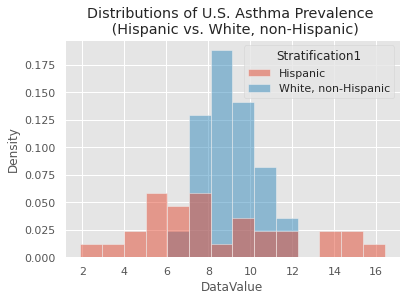

In [ ]:
sns.histplot(data=q3_asthma_ab, x='DataValue', hue='Stratification1', stat='density') # Hispanic and White, Non-Hispanic
plt.title("Distributions of U.S. Asthma Prevalence \n (Hispanic vs. White, non-Hispanic)");

In [ ]:
q3_observed_grouped = list(q3_asthma_ab.groupby(['Stratification1']).mean()['DataValue'])

q3_observed_statistic = q3_observed_grouped[0] - q3_observed_grouped[1] # Hispanic - White, Non-Hispanic

In [ ]:
def q3_statistic():
    tbl = q3_asthma_ab.copy()
    shuffled = q3_asthma_ab.sample(n=len(tbl['DataValue']), replace=False) #resample the data
    
    tbl['Stratification1'] = np.array(list(shuffled['Stratification1'])) #shuffled year label

    grouped = list(tbl.groupby(["Stratification1"]).mean()['DataValue']) # gets the mean of the shuffled years

    return grouped[0] - grouped[1] # Hispanic - White, Non-Hispanic

In [ ]:
q3_iterations = 1000

q3_stats = np.array([])

for i in np.arange(q3_iterations):
    q3_sample = q3_statistic()
    q3_stats = np.append(q3_stats, q3_sample)

In [ ]:
q3_p_value = np.count_nonzero(q3_stats >= q3_observed_statistic) / len(q3_stats)

In [ ]:
q3_p_value

0.832

#### Q4: Is there a difference in county 24-hr average PM2.5 concentrations across LA County and Alameda County?
Null: There is no significant difference in 24-hr average PM2.5 rates across LA County and Alameda County in 2014. Any difference is due to chance.

Alternative: There is a significant difference in 24-hr average PM2.5 rates across LA County and Alameda County in 2014.


In [ ]:
q4_pm_county = df_pm[(df_pm['countyfips'] == 6037) | (df_pm['countyfips'] == 6001)] # LA County's PM2.5 concentration in 2014
q4_pm_county_2014 = q4_pm_county[q4_pm_county['year'] == 2014]
# q4_pm_alameda_county_2014 = df_pm[(df_pm['countyfips'] == 6001) & (df_pm['year'] == 2014)]

In [ ]:
q4_pm_county_2014.groupby("countyfips").size()

countyfips
6001     2598
6037    16167
dtype: int64

In [ ]:
q4_pm_ab = q4_pm_county_2014[['countyfips', 'ds_pm_pred']]

In [ ]:
q4_pm_ab.columns

Index(['countyfips', 'ds_pm_pred'], dtype='object')

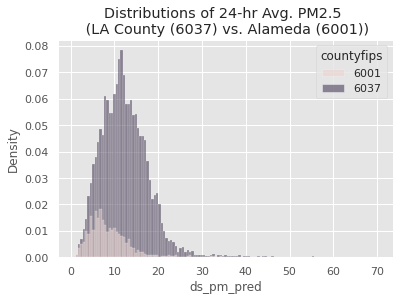

In [ ]:
sns.histplot(data=q4_pm_ab, x='ds_pm_pred', hue='countyfips', stat='density') # LA County vs. CA Counties
plt.title("Distributions of 24-hr Avg. PM2.5 \n (LA County (6037) vs. Alameda (6001))");

In [ ]:
q4_observed_grouped = list(q4_pm_ab.groupby(['countyfips']).median()['ds_pm_pred']) # median isn't influenced by outliers like the mean is

q4_observed_statistic = np.abs(q4_observed_grouped[1] - q4_observed_grouped[0]) # LA County vs California

In [ ]:
def q4_statistic():
    tbl = q4_pm_ab.copy()
    shuffled = q4_pm_ab.sample(n=len(q4_pm_ab['ds_pm_pred']), replace=False) #resample the data
    
    tbl['countyfips'] = np.array(list(shuffled['countyfips'])) #shuffled year label

    grouped = list(tbl.groupby(["countyfips"]).median()['ds_pm_pred']) # gets the median of the shuffled years

    return np.abs(grouped[1] - grouped[0]) # LA County vs California

In [ ]:
q4_iterations = 1000

q4_stats = np.array([])

for i in np.arange(q4_iterations):
    q4_sample = q4_statistic()
    q4_stats = np.append(q4_stats, q4_sample)

In [ ]:
q4_p_value = np.count_nonzero(q4_stats >= q4_observed_statistic) / len(q4_stats)

In [ ]:
q4_p_value

0.0

#### Q5: Is there a difference in state 24-hr average PM2.5 concentrations across California and Texas?
Null: There is no significant difference in 24-hr average PM2.5 rates across California and Texas in 2014. Any difference is due to chance.

Alternative: There is a significant difference in 24-hr average PM2.5 rates across California and Texas in 2014. 

In [ ]:
cali_fips = df_pm[(df_pm["statefips"] == 6) & (df_pm["year"] == 2014)] # California is 6
texas_fips = df_pm[(df_pm["statefips"] == 48) & (df_pm["year"] == 2014)] # Texas is 48
cali_texas_fips_2014 = pd.concat([cali_fips, texas_fips])

In [ ]:
cali_texas_fips_2014.columns

Index(['year', 'date', 'statefips', 'countyfips', 'ctfips', 'latitude',
       'longitude', 'ds_pm_pred', 'ds_pm_stdd'],
      dtype='object')

In [ ]:
q5_pm_ab = cali_texas_fips_2014[['statefips', 'ds_pm_pred']]
q5_pm_ab['statefips'] = q5_pm_ab['statefips'].replace({6: "California", 48: "Texas"})

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


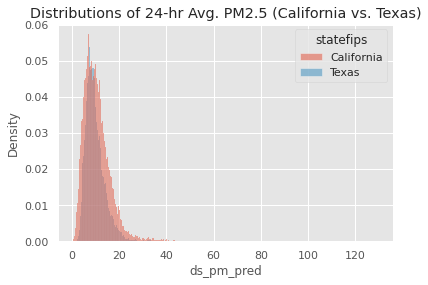

In [ ]:
sns.histplot(data=q5_pm_ab, x='ds_pm_pred', hue='statefips', stat='density')
plt.title("Distributions of 24-hr Avg. PM2.5 (California vs. Texas)");

In [ ]:
q5_observed_grouped = list(q5_pm_ab.groupby('statefips').median()['ds_pm_pred']) 
q5_observed_statistic = np.abs(q5_observed_grouped[0] - q5_observed_grouped[1]) # California - Texas Median PM2.5

In [ ]:
def q5_statistic():
    tbl = q5_pm_ab.copy()
    shuffled = q5_pm_ab.sample(n=len(q5_pm_ab['ds_pm_pred']), replace=False) #resample the data
    
    tbl['statefips'] = np.array(list(shuffled['statefips'])) #shuffled year label

    grouped = list(tbl.groupby(["statefips"]).median()['ds_pm_pred']) # gets the median of the shuffled years

    return np.abs(grouped[0] - grouped[1]) # California - Texas Median PM2.5

In [ ]:
q5_iterations = 1000

q5_stats = np.array([])

for i in np.arange(q5_iterations):
    q5_sample = q5_statistic()
    q5_stats = np.append(q5_stats, q5_sample)

In [ ]:
q5_p_value = np.count_nonzero(q5_stats >= q5_observed_statistic) / len(q5_stats)

In [ ]:
q5_p_value

0.0

### Correction

In [ ]:
p_values = np.array([p_value, q2_p_value, q3_p_value, q4_p_value, q5_p_value])
alpha = 0.05

In [ ]:
p_values

array([0.206, 0.   , 0.827, 0.   , 0.   ])

#### Naive

In [ ]:
def naive_alpha_threshold(p_values, alpha):
    """
    Returns decisions on p-values using naive (uncorrected) thresholding.
    
    Inputs:
        p_values: array of p-values
        alpha: threshold (significance level)
    
    Returns:
        decisions: binary array of same length as p-values, where `decisions[i]` is 1
        if `p_values[i]` is deemed significant at level `alpha`, and 0 otherwize
    """

    decisions = alpha > p_values # TODO: fill in
    return decisions

In [ ]:
naive_decisions = naive_alpha_threshold(p_values, alpha)
naive_decisions

array([False,  True, False,  True,  True])

#### Bonferroni

In [ ]:
def bonferroni(p_values, alpha_total):
    """
    Returns decisions on p-values using the Bonferroni correction.
    
    Inputs:
        p_values: array of p-values
        alpha_total: desired family-wise error rate (FWER = P(at least one false discovery))
    
    Returns:
        decisions: binary array of same length as p-values, where `decisions[i]` is 1
        if `p_values[i]` is deemed significant, and 0 otherwise
    """

    decisions = (alpha_total/len(p_values)) > p_values # TODO: fill in
    return (alpha_total/len(p_values)), decisions

In [ ]:
bonferroni_threshold, bonferroni_decisions = bonferroni(p_values, alpha)
bonferroni_threshold, bonferroni_decisions

(0.01, array([False,  True, False,  True,  True]))

#### Benjamini-Hochberg

In [ ]:
def benjamini_hochberg(p_values, alpha):
    """
    Returns decisions on p-values using Benjamini-Hochberg.
    
    Inputs:
        p_values: array of p-values
        alpha: desired FDR (FDR = E[# false positives / # positives])
    
    Returns:
        decisions: binary array of same length as p-values, where `decisions[i]` is 1
        if `p_values[i]` is deemed significant, and 0 otherwise
    """
    n = len(p_values)
    k = np.arange(1, n+1)
    sorted_p_values = np.sort(p_values)
    
    line = k * alpha/n
    print(line)
    threshold = max(sorted_p_values[sorted_p_values < line])
    print(threshold)
    decisions = threshold >= p_values # TODO: fill in
    return threshold, decisions

In [ ]:
bh_threshold, bh_decisions = benjamini_hochberg(p_values, alpha)
bh_threshold, bh_decisions

[0.01 0.02 0.03 0.04 0.05]
0.0


(0.0, array([False,  True, False,  True,  True]))

In [ ]:
np.sort(p_values)[np.sort(p_values) < np.array([0.01, 0.02, 0.03, 0.04, 0.05])]

array([0., 0., 0.])

# Causal Inference

In [ ]:
pip install statsmodels

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
asthma = pd.read_csv("U.S._Chronic_Disease_Indicators__Asthma.csv")
tobacco = pd.read_csv("U.S._Chronic_Disease_Indicators__Tobacco.csv")

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3173: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
asthma_q = 'Current asthma prevalence among adults aged >= 18 years'
tobacco_q = 'Current smoking among adults aged >= 18 years'

asthma_all_q = asthma[asthma['Question'] == asthma_q]
tobacco_all_q = tobacco[tobacco['Question'] == tobacco_q]

In [ ]:
df_pm = pd.read_csv("smaller_PM2.5.csv")
df_pm = df_pm.drop(columns="Unnamed: 0")

In [ ]:
df_pm.head()

,year,date,statefips,countyfips,ctfips,latitude,longitude,ds_pm_pred,ds_pm_stdd
0,2011,27NOV2011,6,6037,6037502500,33.97726,-118.11006,8.157600,2.777932
1,2011,21AUG2011,12,12086,12086009036,25.83332,-80.37867,9.408597,2.126664
2,2011,01JAN2011,45,45045,45045002804,34.86177,-82.30892,22.934197,5.545795
3,2011,03JUL2011,49,49035,49035101800,40.75523,-111.86679,11.379322,2.161727
4,2011,16SEP2011,48,48039,48039663900,29.01409,-95.40389,12.972203,3.744467


## Causal Inference Experiments:

We will examine the causal inference of whether higher levels of PM2.5 cause higher levels of asthma; we will focus on 48 totals states and an "overall" stratification as a case study.

In [ ]:
 # filtering for stratification overall an crude prevalence
asthma_q = asthma_all_q[asthma_all_q['StratificationCategory1'] == 'Overall'] #filtering for overall stratification categories
asthma_crudeprev_q = asthma_q[asthma_q['DataValueType'] == "Crude Prevalence"] #filtering for crude prevalence

In [ ]:
asthma_crudeprev_q.sort_values('YearStart', ascending=True).head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
29892,2011,2011,NM,New Mexico,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Crude Prevalence,...,35,AST,AST1_1,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
31865,2011,2011,KY,Kentucky,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Crude Prevalence,...,21,AST,AST1_1,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
24337,2011,2011,WY,Wyoming,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Crude Prevalence,...,56,AST,AST1_1,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
32310,2011,2011,UT,Utah,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Crude Prevalence,...,49,AST,AST1_1,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
32608,2011,2011,GA,Georgia,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,NaN,%,Crude Prevalence,...,13,AST,AST1_1,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN


In [ ]:
df_pm_11_14 = df_pm.groupby(['year', 'statefips']).agg({'ds_pm_pred': np.mean,'ds_pm_stdd': np.mean}).reset_index()

In [ ]:
## df_pm_11_14 missing alaska 2, hawaii 15, contains 11 district of columbia
## so I dropped district of column
## since alaska and hawaii are missing here, I decided to drop them in asthma too

# drop district of columbia
df_pm_11_14 = df_pm_11_14[df_pm_11_14['statefips'] != 11]
#df_pm_11_14.shape

df_pm_11_14

,year,statefips,ds_pm_pred,ds_pm_stdd
0,2011,1,10.759372,3.134189
1,2011,4,7.916462,3.068858
2,2011,5,10.634377,3.255479
3,2011,6,10.423297,2.804313
4,2011,8,6.367242,2.309900
...,...,...,...,...
191,2014,51,8.910315,4.104011
192,2014,53,7.341772,3.415530
193,2014,54,9.609605,4.921912
194,2014,55,9.418034,4.791882


In [ ]:
## asthma has 9 years but only kept the same years pm 2.5 has
## has 5 extra :72 puerto rico,  66 for guam, 78 virgin islands, USA, 
## district of columbia
asthma_11_14 = asthma_crudeprev_q.loc[(asthma_crudeprev_q['YearStart'] == 2011) | (asthma_crudeprev_q['YearStart'] == 2012) | (asthma_crudeprev_q['YearStart'] == 2013) | (asthma_crudeprev_q['YearStart'] == 2014)]   
asthma_11_14 = asthma_11_14[asthma_11_14['LocationDesc'] != 'District of Columbia']
asthma_11_14 = asthma_11_14[asthma_11_14['LocationDesc'] != 'Virgin Islands']
asthma_11_14 = asthma_11_14[asthma_11_14['LocationDesc'] != 'Guam']
asthma_11_14 = asthma_11_14[asthma_11_14['LocationDesc'] != 'Puerto Rico']
asthma_11_14 = asthma_11_14[asthma_11_14['LocationDesc'] != 'United States']


## could keep alaska but assign them pm2.5 based on mean of column
## alaska and hawaii are not in pm 2.5 dataset
asthma_11_14 = asthma_11_14[asthma_11_14['LocationDesc'] != 'Hawaii']
asthma_11_14 = asthma_11_14[asthma_11_14['LocationDesc'] != 'Alaska']
asthma_11_14.shape

(192, 33)

In [ ]:
df_pm_11_14.head()

,year,statefips,ds_pm_pred,ds_pm_stdd
0,2011,1,10.759372,3.134189
1,2011,4,7.916462,3.068858
2,2011,5,10.634377,3.255479
3,2011,6,10.423297,2.804313
4,2011,8,6.367242,2.309900


In [ ]:
#df_pm_11_14 = df_pm_11_14[df_pm_11_14['statefips'] != 11]

#countyfips = np.array(df_pm_11_14['countyfips']) # might want to save as a later covariate

statefips = np.array(df_pm_11_14['statefips'])
df_pm_11_14.shape # 192 = 48 states * 4 years

(192, 4)

In [ ]:
asthma_11_14 = asthma_11_14.groupby(['YearStart', 'LocationDesc']).agg({'DataValueAlt': np.mean}).reset_index()
asthma_11_14['statefips'] = statefips
asthma_11_14.shape

(192, 4)

In [ ]:
## need to fix
df_pm_11_14 = df_pm_11_14.reset_index().drop(columns = 'index')
asthma_11_14 = asthma_11_14.reset_index().drop(columns = 'index')

In [ ]:
df_pm_asthma_11_14 = df_pm_11_14.merge(asthma_11_14, how = 'left', left_on = ['year', 'statefips'], right_on = ['YearStart', 'statefips'])

In [ ]:
df_pm_asthma_11_14.head()

,year,statefips,ds_pm_pred,ds_pm_stdd,YearStart,LocationDesc,DataValueAlt
0,2011,1,10.759372,3.134189,2011,Alabama,8.0
1,2011,4,7.916462,3.068858,2011,Arizona,9.7
2,2011,5,10.634377,3.255479,2011,Arkansas,9.5
3,2011,6,10.423297,2.804313,2011,California,8.4
4,2011,8,6.367242,2.309900,2011,Colorado,8.3


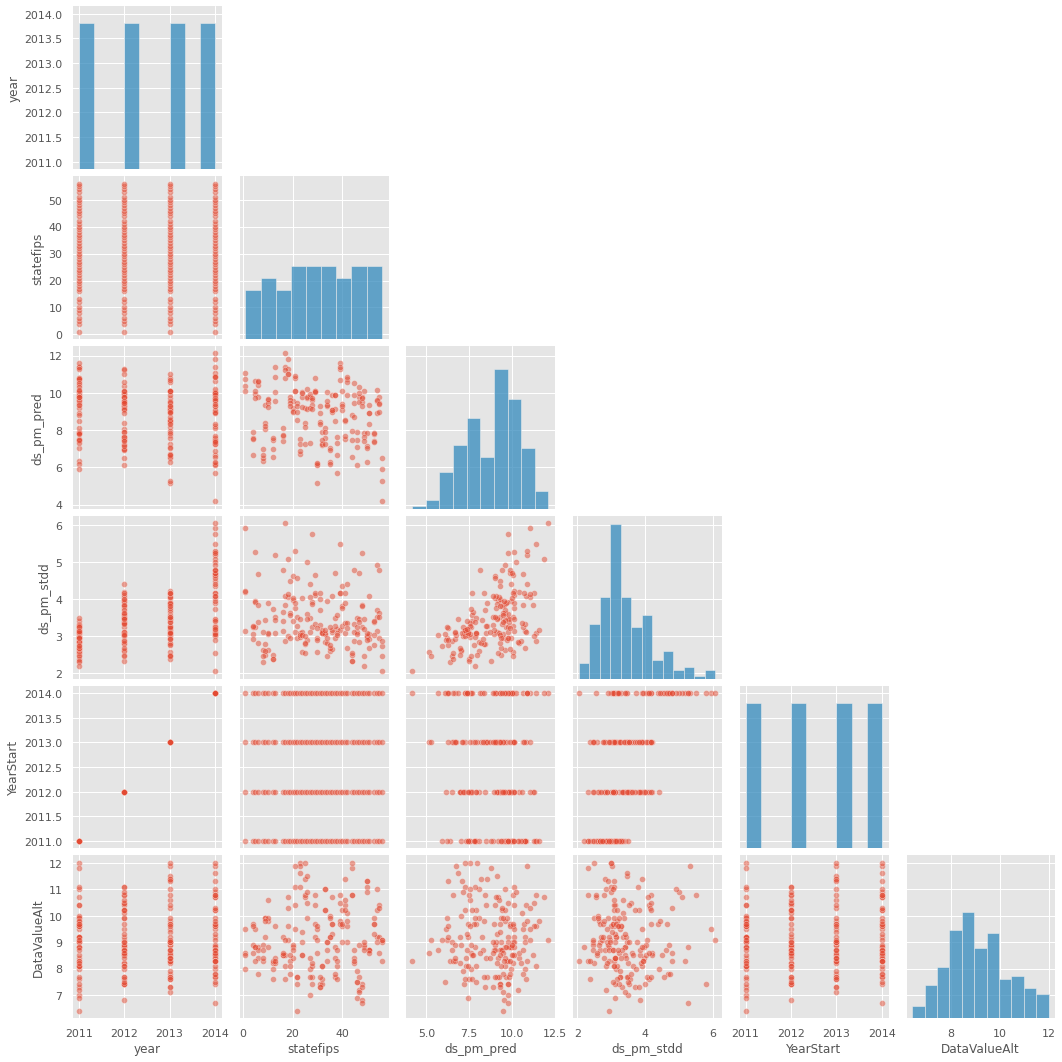

In [ ]:
# plotting a pairplot for all the columns in the updated dataset
fig = sns.pairplot(df_pm_asthma_11_14, plot_kws=dict(marker="o", alpha = 0.5))

for i, j in zip(*np.triu_indices_from(fig.axes, 1)):
    fig.axes[i, j].set_visible(False)

In [ ]:
df_pm_asthma_11_14[df_pm_asthma_11_14["LocationDesc"]=='California']

,year,statefips,ds_pm_pred,ds_pm_stdd,YearStart,LocationDesc,DataValueAlt
3,2011,6,10.423297,2.804313,2011,California,8.4
51,2012,6,9.788125,3.395979,2012,California,8.8
99,2013,6,10.608639,3.844975,2013,California,8.7
147,2014,6,10.626601,4.678744,2014,California,7.8


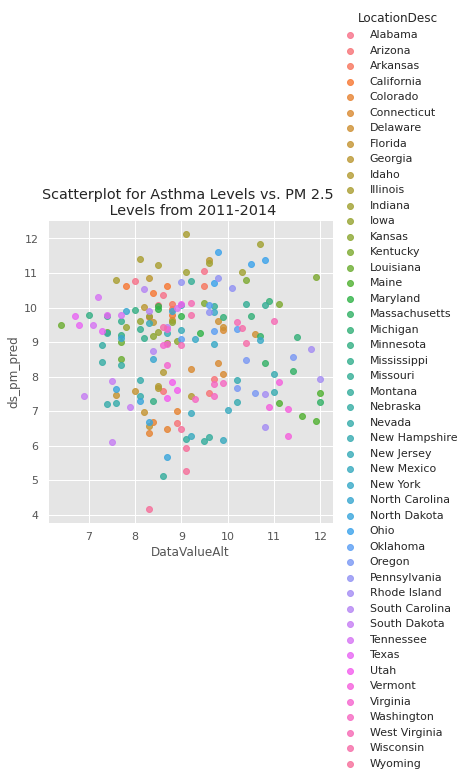

In [ ]:
# 4 points for each state (one for every year between 2011-2014)
sns.lmplot(x='DataValueAlt', y='ds_pm_pred', data=df_pm_asthma_11_14, hue='LocationDesc', fit_reg=False)
plt.title('Scatterplot for Asthma Levels vs. PM 2.5 \n Levels from 2011-2014')
plt.xlabel('DataValueAlt')
plt.ylabel('ds_pm_pred');

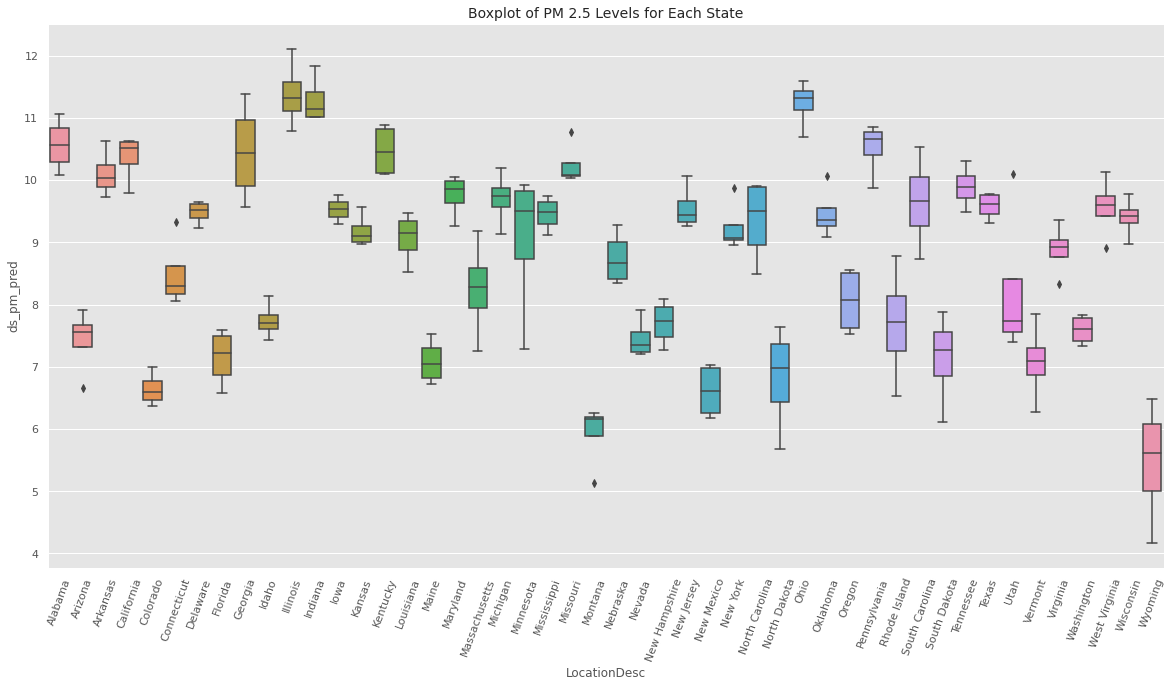

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=70)
sns.boxplot(x="LocationDesc", y="ds_pm_pred", data=df_pm_asthma_11_14)
plt.title("Boxplot of PM 2.5 Levels for Each State", fontsize=14);

In [ ]:
# function that produces a scatterplot for pm 2.5 levels vs asthma levels for EACH state and all 4 years
def scatter_each_state(df, state_string):
    df = df[df['LocationDesc'] == state_string]
    sns.lmplot(x='DataValueAlt', y='ds_pm_pred', data=df, fit_reg=False)
    plt.title('Scatterplot for Asthma Levels vs. PM 2.5 \n Levels in ' + state_string + ' from 2011-2014')
    plt.xlabel('DataValueAlt')
    plt.ylabel('ds_pm_pred')
    plt.show()

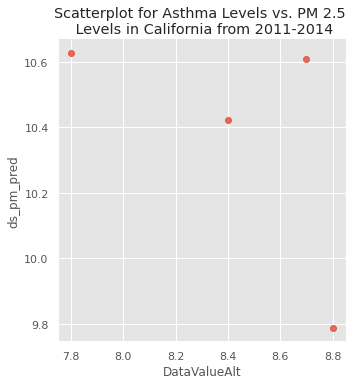

In [ ]:
# checking only for California
scatter_each_state(df_pm_asthma_11_14, 'California')

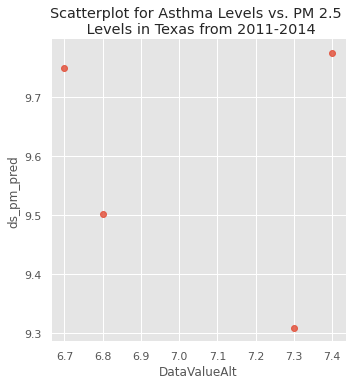

In [ ]:
# checking only for Texas
scatter_each_state(df_pm_asthma_11_14, 'Texas')

In [ ]:
def fit_OLS(df, target_var, explanatory_vars, intercept=False):
    target = df[target_var] 
    inputs = df[explanatory_vars] 
    if intercept == True:
        inputs = sm.add_constant(inputs)
    model_fit = sm.OLS(target, inputs).fit() 
    return(model_fit)

In [ ]:
 # Computing the OLS estimators for gamma_1 and gamma_2
 # target variable: DataValueAlt
 # explanatory variable: ds_pm_pred
gammas_model = fit_OLS(df_pm_asthma_11_14, 'DataValueAlt', ['ds_pm_pred'])
print(gammas_model.summary())

                                 OLS Regression Results                                
Dep. Variable:           DataValueAlt   R-squared (uncentered):                   0.952
Model:                            OLS   Adj. R-squared (uncentered):              0.951
Method:                 Least Squares   F-statistic:                              3763.
Date:                Mon, 13 Dec 2021   Prob (F-statistic):                   1.25e-127
Time:                        09:11:22   Log-Likelihood:                         -407.82
No. Observations:                 192   AIC:                                      817.6
Df Residuals:                     191   BIC:                                      820.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
 # Computing the OLS estimators as above, but with an intercept
gammas_model = fit_OLS(df_pm_asthma_11_14, 'DataValueAlt', ['ds_pm_pred'], intercept=True)
print(gammas_model.summary())

                            OLS Regression Results                            
Dep. Variable:           DataValueAlt   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.5215
Date:                Mon, 13 Dec 2021   Prob (F-statistic):              0.471
Time:                        09:11:22   Log-Likelihood:                -312.12
No. Observations:                 192   AIC:                             628.2
Df Residuals:                     190   BIC:                             634.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.5012      0.527     18.024      0.0

## Experiments with Tobacco Merging, adding covariates:

In [ ]:
# Feedback:
#justify possible confounders to add to fit the OLS model
# work off Hw/lab to manually estimate prop score

# account for a possible treatment variable: compare 'ds_pm_pred' to a specific threshold for binary treatments 
#(use a plot to justify choice of threshold) 
# create a variable called 'treatment' = 0 or 1


In [ ]:
# Adding countyfips as a covariate might be a challenge - asthma & tobacco only have states accounted for


# for adding the countyfips covariate, create a copy of the original merged dataset --> including countyfips gives 12430 rows instead of 192
# this might be too complicated since asthma and tobacco account for states
df_pm_11_14_with_countyfips = df_pm.groupby(['year', 'statefips', 'countyfips']).agg({'ds_pm_pred': np.mean,'ds_pm_stdd': np.mean}).reset_index()
df_pm_11_14_with_countyfips

,year,statefips,countyfips,ds_pm_pred,ds_pm_stdd
0,2011,1,1001,10.582763,3.270424
1,2011,1,1003,9.020311,3.204055
2,2011,1,1005,9.824061,3.349786
3,2011,1,1007,11.191245,3.073163
4,2011,1,1009,10.970886,3.125455
...,...,...,...,...,...
12429,2014,56,56037,4.536524,2.366219
12430,2014,56,56039,5.247436,2.841056
12431,2014,56,56041,5.889213,3.015100
12432,2014,56,56043,4.252129,2.260101


In [ ]:
# start with cleaning and merging the tobacco sets

# filtering for stratification overall an crude prevalence
tobacco_q = tobacco_all_q[tobacco_all_q['StratificationCategory1'] == 'Overall'] #filtering for overall stratification categories
tobacco_crudeprev_q = tobacco_q[tobacco_q['DataValueType'] == "Crude Prevalence"] #filtering for crude prevalence


In [ ]:
tobacco_crudeprev_q.sort_values('YearStart', ascending=True)

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
20124,2011,2011,NY,New York,BRFSS,Tobacco,Current smoking among adults aged >= 18 years,NaN,%,Crude Prevalence,...,36,TOB,TOB1_2,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
23654,2011,2011,MS,Mississippi,BRFSS,Tobacco,Current smoking among adults aged >= 18 years,NaN,%,Crude Prevalence,...,28,TOB,TOB1_2,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
18897,2011,2011,AR,Arkansas,BRFSS,Tobacco,Current smoking among adults aged >= 18 years,NaN,%,Crude Prevalence,...,5,TOB,TOB1_2,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
23220,2011,2011,GA,Georgia,BRFSS,Tobacco,Current smoking among adults aged >= 18 years,NaN,%,Crude Prevalence,...,13,TOB,TOB1_2,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
26834,2011,2011,FL,Florida,BRFSS,Tobacco,Current smoking among adults aged >= 18 years,NaN,%,Crude Prevalence,...,12,TOB,TOB1_2,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27374,2019,2019,ND,North Dakota,BRFSS,Tobacco,Current smoking among adults aged >= 18 years,NaN,%,Crude Prevalence,...,38,TOB,TOB1_2,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
16401,2019,2019,NJ,New Jersey,BRFSS,Tobacco,Current smoking among adults aged >= 18 years,NaN,%,Crude Prevalence,...,34,TOB,TOB1_2,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
22981,2019,2019,RI,Rhode Island,BRFSS,Tobacco,Current smoking among adults aged >= 18 years,NaN,%,Crude Prevalence,...,44,TOB,TOB1_2,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
21188,2019,2019,WA,Washington,BRFSS,Tobacco,Current smoking among adults aged >= 18 years,NaN,%,Crude Prevalence,...,53,TOB,TOB1_2,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN


In [ ]:
tobacco_11_14 = tobacco_crudeprev_q.loc[(tobacco_crudeprev_q['YearStart'] == 2011) | (tobacco_crudeprev_q['YearStart'] == 2012) | (tobacco_crudeprev_q['YearStart'] == 2013) | (tobacco_crudeprev_q['YearStart'] == 2014)]   
tobacco_11_14 = tobacco_11_14[tobacco_11_14['LocationDesc'] != 'District of Columbia']
tobacco_11_14 = tobacco_11_14[tobacco_11_14['LocationDesc'] != 'Virgin Islands']
tobacco_11_14 = tobacco_11_14[tobacco_11_14['LocationDesc'] != 'Guam']
tobacco_11_14 = tobacco_11_14[tobacco_11_14['LocationDesc'] != 'Puerto Rico']
tobacco_11_14 = tobacco_11_14[tobacco_11_14['LocationDesc'] != 'United States']


## could keep alaska but assign them pm2.5 based on mean of column
## alaska and hawaii are not in pm 2.5 dataset
tobacco_11_14 = tobacco_11_14[tobacco_11_14['LocationDesc'] != 'Hawaii']
tobacco_11_14 = tobacco_11_14[tobacco_11_14['LocationDesc'] != 'Alaska']
tobacco_11_14.shape

(192, 33)

In [ ]:
tobacco_11_14 = tobacco_11_14.groupby(['YearStart', 'LocationDesc']).agg({'DataValueAlt': np.mean}).reset_index()
tobacco_11_14['statefips'] = statefips

In [ ]:
tobacco_11_14 = tobacco_11_14.reset_index().drop(columns = 'index')
tobacco_11_14

,YearStart,LocationDesc,DataValueAlt,statefips
0,2011,Alabama,24.3,1
1,2011,Arizona,19.3,4
2,2011,Arkansas,27.0,5
3,2011,California,13.7,6
4,2011,Colorado,18.3,8
...,...,...,...,...
187,2014,Virginia,19.5,51
188,2014,Washington,15.3,53
189,2014,West Virginia,26.7,54
190,2014,Wisconsin,17.4,55


In [ ]:
# merge onto df_pm_asthma_11_14 to create df_pm_asthma_tobacco_11_14
# idk if this works yet

df_pm_asthma_tobacco_11_14 = df_pm_11_14.merge(asthma_11_14, how = 'left', left_on = ['year', 'statefips'], right_on = ['YearStart', 'statefips']).merge(tobacco_11_14, how = 'left', left_on = ['year', 'statefips'], right_on = ['YearStart', 'statefips'])


In [ ]:
df_pm_asthma_tobacco_11_14 = df_pm_asthma_tobacco_11_14.rename(columns={"DataValueAlt_x": "DataValueAlt_asthma", 
                                                                        "DataValueAlt_y": "DataValueAlt_tobacco",
                                                                        "LocationDesc_x": "LocationDesc"})


In [ ]:
df_pm_asthma_tobacco_11_14 = df_pm_asthma_tobacco_11_14.drop(columns=['YearStart_x', 'YearStart_y', 'LocationDesc_y'])\


In [ ]:
df_pm_asthma_tobacco_11_14

,year,statefips,ds_pm_pred,ds_pm_stdd,LocationDesc,DataValueAlt_asthma,DataValueAlt_tobacco
0,2011,1,10.759372,3.134189,Alabama,8.0,24.3
1,2011,4,7.916462,3.068858,Arizona,9.7,19.3
2,2011,5,10.634377,3.255479,Arkansas,9.5,27.0
3,2011,6,10.423297,2.804313,California,8.4,13.7
4,2011,8,6.367242,2.309900,Colorado,8.3,18.3
...,...,...,...,...,...,...,...
187,2014,51,8.910315,4.104011,Virginia,8.6,19.5
188,2014,53,7.341772,3.415530,Washington,9.3,15.3
189,2014,54,9.609605,4.921912,West Virginia,11.0,26.7
190,2014,55,9.418034,4.791882,Wisconsin,10.3,17.4


In [ ]:
# Computing the OLS estimators as above, but with an intercept

## covariates to consider adding : statefips, tobacco datavaluealt, ds_pm_stdd, latitude, longitude 
# going to have to merge tobacco to the data?


## ask about how to add inverse propensity weighting --> use logistic regression to estimate prop score, 
#consider random forests to create binary classification

gammas_model_1 = fit_OLS(df_pm_asthma_tobacco_11_14, 'DataValueAlt_asthma', ['ds_pm_pred', 'DataValueAlt_tobacco', 'statefips', 'ds_pm_stdd', 'year'], intercept=True)
print(gammas_model_1.summary())

                             OLS Regression Results                            
Dep. Variable:     DataValueAlt_asthma   R-squared:                       0.036
Model:                             OLS   Adj. R-squared:                  0.010
Method:                  Least Squares   F-statistic:                     1.388
Date:                 Mon, 13 Dec 2021   Prob (F-statistic):              0.231
Time:                         09:11:23   Log-Likelihood:                -308.86
No. Observations:                  192   AIC:                             629.7
Df Residuals:                      186   BIC:                             649.3
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 

In [ ]:
gammas = gammas_model_1.params
gammas[1]

0.08929403689734791

In [ ]:
# Feedback:
#justify possible confounders to add to fit the OLS model in the explanation
# work off HW/lab to manually estimate prop score

# account for a possible treatment variable: compare 'ds_pm_pred' to a specific threshold for binary treatments 
#(use plots to justify choice of threshold) 
# create a variable called 'treatment' = 0 or 1

## Experiments for getting threshold to compare treatment variable:

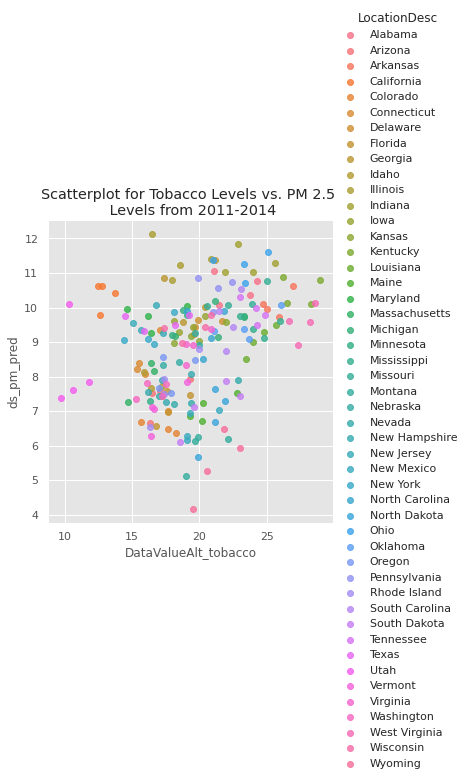

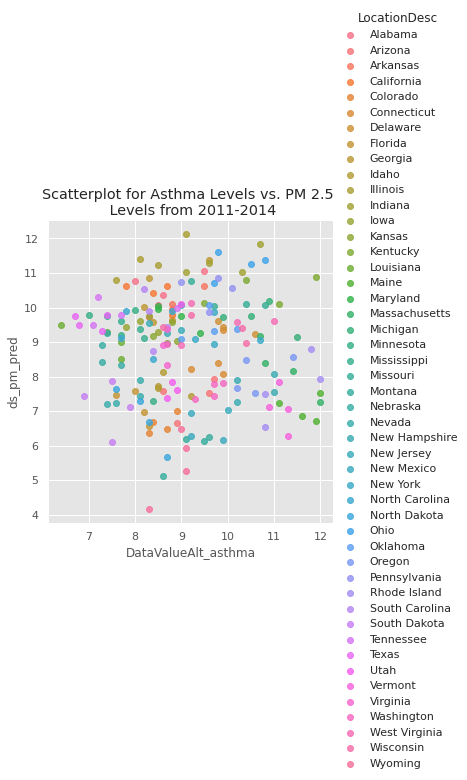

In [ ]:
## Add visuals for checking patterns of the ds_pm_pred values (histograms, scatterplots, countplots) --> use this to decide on a threshold

sns.lmplot(x='DataValueAlt_tobacco', y='ds_pm_pred', data=df_pm_asthma_tobacco_11_14, hue='LocationDesc', fit_reg=False)
plt.title('Scatterplot for Tobacco Levels vs. PM 2.5 \n Levels from 2011-2014')
plt.xlabel('DataValueAlt_tobacco')
plt.ylabel('ds_pm_pred')


sns.lmplot(x='DataValueAlt_asthma', y='ds_pm_pred', data=df_pm_asthma_tobacco_11_14, hue='LocationDesc', fit_reg=False)
plt.title('Scatterplot for Asthma Levels vs. PM 2.5 \n Levels from 2011-2014')
plt.xlabel('DataValueAlt_asthma')
plt.ylabel('ds_pm_pred')

plt.show()

In [ ]:
print("Min ds_pm_pred: ", df_pm_asthma_tobacco_11_14['ds_pm_pred'].min())
print("Max ds_pm_pred: ", df_pm_asthma_tobacco_11_14['ds_pm_pred'].max())


Min ds_pm_pred:  4.171506497297294
Max ds_pm_pred:  12.115147477867996


In [ ]:



# m = training.groupby('contraceptive').agg(np.sum)[['husband_education=1','husband_education=2','husband_education=3','husband_education=4']]
# m.plot(kind='barh')
# plt.xlim([0,500])
# plt.legend(fontsize='xx-small')
# plt.xlabel('count')
# plt.ylabel('contraceptive type')
# plt.title("Number of each Husband's Education Level by Contraceptive Type")

#should we create threshold_bins for the ds_pm_pred valuesfrom 0 to 12?



def adding_threshold_bins(ds_pm_pred_values):
    
    thresh_bins = []
    thresh_val = 0

    for i in ds_pm_pred_values:

        if i < 4.5:
            thresh_val = 4

        elif i >= 4.5 and i < 5.5:
            thresh_val = 5
        
        elif i >= 5.5 and i < 6.5:
            thresh_val = 6

        elif i >= 6.5 and i < 7.5:
            thresh_val = 7

        elif i >= 7.5 and i < 8.5:
            thresh_val = 8
        
        elif i >= 8.5 and i < 9.5:
            thresh_val = 9
        
        elif i >= 9.5 and i < 10.5:
            thresh_val = 10
        
        elif i >= 10.5 and i < 11.5:
            thresh_val = 11
        
        else:
            thresh_val = 12

        thresh_bins.append(thresh_val)    
    return thresh_bins

#df_pm_asthma_tobacco_11_14['ds_pm_pred'].max()
    
    #['threshold_bin']

In [ ]:
threshold_bins = np.round(df_pm_asthma_tobacco_11_14['ds_pm_pred'])
#threshold_bins

In [ ]:
df_pm_asthma_tobacco_11_14['threshold_bins'] = threshold_bins
df_pm_asthma_tobacco_11_14

,year,statefips,ds_pm_pred,ds_pm_stdd,LocationDesc,DataValueAlt_asthma,DataValueAlt_tobacco,threshold_bins
0,2011,1,10.759372,3.134189,Alabama,8.0,24.3,11.0
1,2011,4,7.916462,3.068858,Arizona,9.7,19.3,8.0
2,2011,5,10.634377,3.255479,Arkansas,9.5,27.0,11.0
3,2011,6,10.423297,2.804313,California,8.4,13.7,10.0
4,2011,8,6.367242,2.309900,Colorado,8.3,18.3,6.0
...,...,...,...,...,...,...,...,...
187,2014,51,8.910315,4.104011,Virginia,8.6,19.5,9.0
188,2014,53,7.341772,3.415530,Washington,9.3,15.3,7.0
189,2014,54,9.609605,4.921912,West Virginia,11.0,26.7,10.0
190,2014,55,9.418034,4.791882,Wisconsin,10.3,17.4,9.0


In [ ]:
threshold_bins_set = df_pm_asthma_tobacco_11_14.groupby('LocationDesc').mean()[['threshold_bins']].reset_index()
threshold_bins_set

,LocationDesc,threshold_bins
0,Alabama,10.50
1,Arizona,7.75
2,Arkansas,10.25
3,California,10.50
4,Colorado,6.50
5,Connecticut,8.25
6,Delaware,9.50
7,Florida,7.25
8,Georgia,10.50
9,Idaho,7.75


(array([ 2.,  0.,  5.,  4.,  5.,  5.,  7., 10.,  6.,  4.]),
 array([ 5.25,  5.85,  6.45,  7.05,  7.65,  8.25,  8.85,  9.45, 10.05,
        10.65, 11.25]),
 <BarContainer object of 10 artists>)

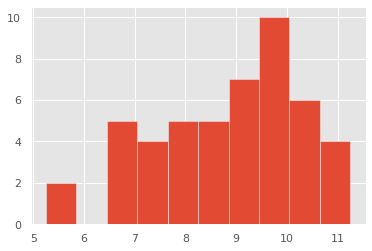

In [ ]:
plt.hist(threshold_bins_set['threshold_bins'])

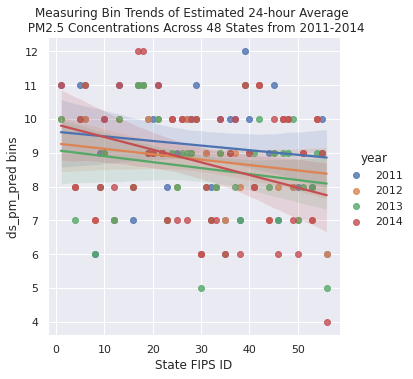

In [ ]:
#plt.figure(figsize=(10, 10))

# plt.scatter(x = df_pm_asthma_tobacco_11_14['statefips'], y = df_pm_asthma_tobacco_11_14['threshold_bins'], c=df_pm_asthma_tobacco_11_14['year'])
# plt.legend()
# plt.show()

sns.set(rc={"figure.figsize":(15, 15)})

ax = sns.lmplot(x='statefips', y='threshold_bins', data= df_pm_asthma_tobacco_11_14, hue='year')

ax.set(xlabel='State FIPS ID', ylabel= 'ds_pm_pred bins', title = "Measuring Bin Trends of Estimated 24-hour Average \n PM2.5 Concentrations Across 48 States from 2011-2014")



In [ ]:
# group by the states to 
threshold_mean_set = df_pm_asthma_tobacco_11_14.groupby('LocationDesc').mean()[['ds_pm_pred']].reset_index()
threshold_mean_set

,LocationDesc,ds_pm_pred
0,Alabama,10.569785
1,Arizona,7.425022
2,Arkansas,10.107775
3,California,10.361665
4,Colorado,6.638981
5,Connecticut,8.499910
6,Delaware,9.485055
7,Florida,7.150351
8,Georgia,10.454530
9,Idaho,7.740082


<Figure size 720x720 with 0 Axes>

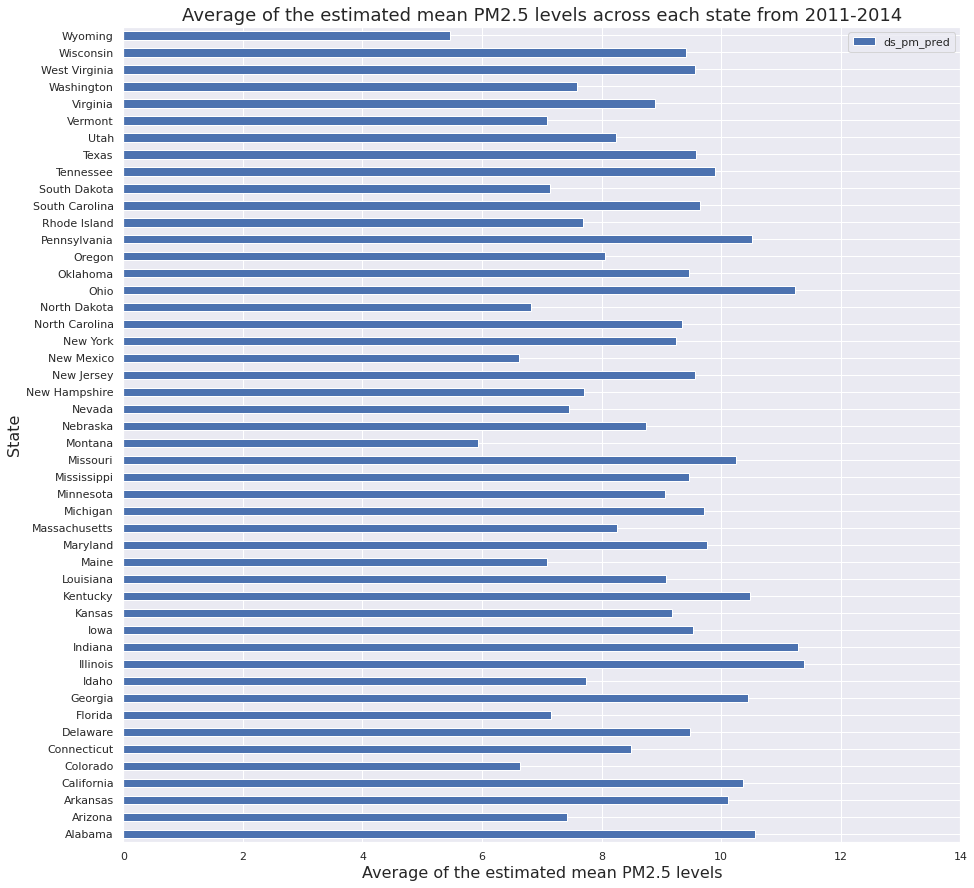

In [ ]:
plt.figure(figsize=(10, 10))

threshold_mean_set.plot(x= 'LocationDesc', y= 'ds_pm_pred', kind='barh')

plt.xlim([0,14])
plt.legend()
plt.title("Average of the estimated mean PM2.5 levels across each state from 2011-2014", fontsize=18)

plt.xlabel('Average of the estimated mean PM2.5 levels', fontsize=16)
plt.ylabel('State', fontsize=16)

plt.show()

Text(0, 0.5, 'State')

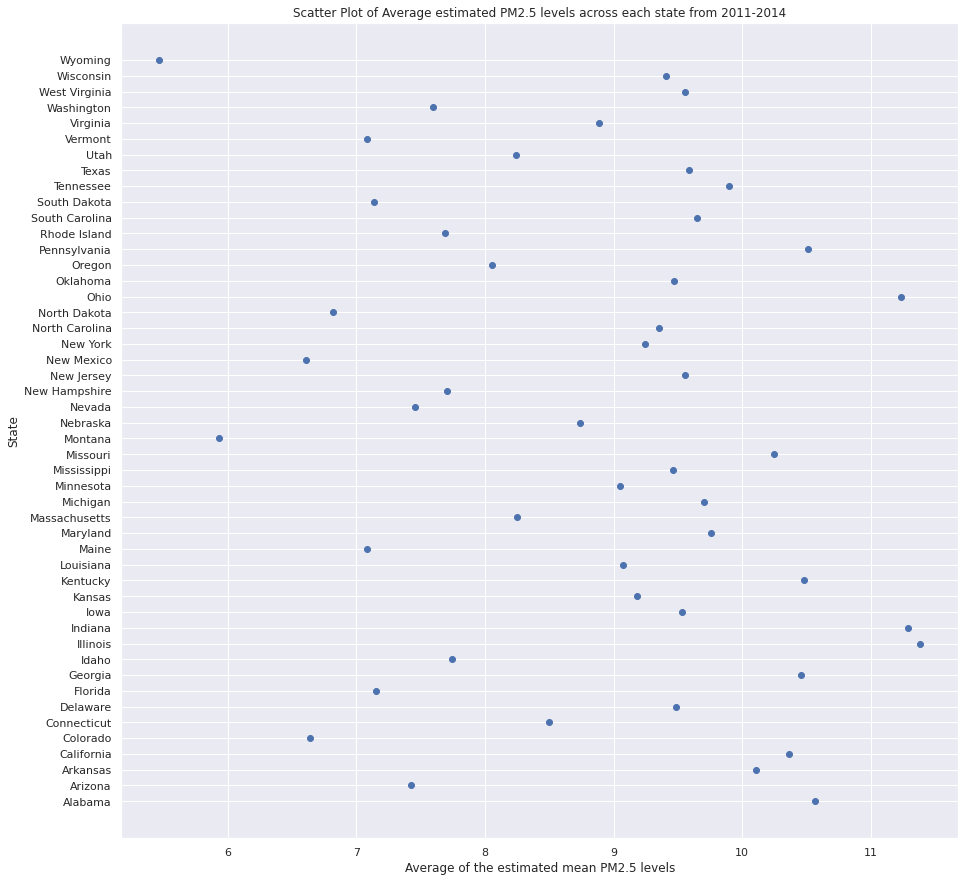

In [ ]:
plt.scatter(threshold_mean_set['ds_pm_pred'], threshold_mean_set['LocationDesc'])

plt.title("Scatter Plot of Average estimated PM2.5 levels across each state from 2011-2014")
plt.xlabel('Average of the estimated mean PM2.5 levels')
plt.ylabel('State')


In [ ]:
threshold_median_set = df_pm_asthma_tobacco_11_14.groupby('LocationDesc').median()[['ds_pm_pred']]
threshold_min_set = df_pm_asthma_tobacco_11_14.groupby('LocationDesc').min()[['ds_pm_pred']]
threshold_max_set = df_pm_asthma_tobacco_11_14.groupby('LocationDesc').max()[['ds_pm_pred']]

In [ ]:
threshold_bins_set

,LocationDesc,threshold_bins
0,Alabama,10.50
1,Arizona,7.75
2,Arkansas,10.25
3,California,10.50
4,Colorado,6.50
5,Connecticut,8.25
6,Delaware,9.50
7,Florida,7.25
8,Georgia,10.50
9,Idaho,7.75


In [ ]:
#threshold_mean_set.value_counts().plot(kind='bar')
#df_pm_asthma_tobacco_11_14['ds_pm_pred'].value_counts().plot(kind='bar')


merged_ds_pm_pred = ['ds_pm_pred']
threshold_means = threshold_mean_set['ds_pm_pred']
threshold_medians = threshold_median_set['ds_pm_pred']
threshold_mins = threshold_min_set['ds_pm_pred']
threshold_maxes = threshold_max_set['ds_pm_pred']

In [ ]:
merged_ds_pm_pred

['ds_pm_pred']

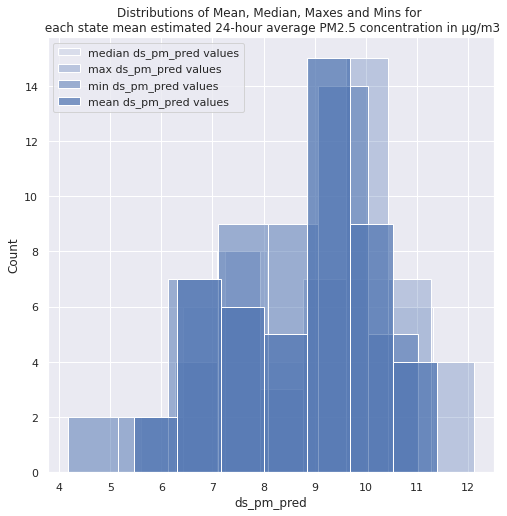

In [ ]:
plt.figure(figsize=(8, 8))

# how do we make the colors transparent so we can see the overlaying?
#sns.histplot(data = merged_ds_pm_pred, label = 'ds_pm_pred values')
sns.histplot(data = threshold_medians, label = 'median ds_pm_pred values', alpha = .1)
sns.histplot(data = threshold_maxes, label = 'max ds_pm_pred values', alpha = .3)
sns.histplot(data = threshold_mins, label = 'min ds_pm_pred values', alpha = .5)
sns.histplot(data = threshold_means, label = 'mean ds_pm_pred values', alpha = .7)

plt.title('Distributions of Mean, Median, Maxes and Mins for \n each state mean estimated 24-hour average PM2.5 concentration in μg/m3')

plt.legend()

plt.show()

In [ ]:
# plt.figure(figsize=(10, 10))

# # how do we make the colors transparent so we can see the overlaying?
# sns.histplot(data = merged_ds_pm_pred, x = 'ds_pm_pred_bins', bins = np.arange(15), label = 'ds_pm_pred values')
# plt.hist(threshold_medians, bins = np.arange(15), label = 'median ds_pm_pred values')
# plt.hist(threshold_maxes, bins = np.arange(15), label = 'max ds_pm_pred values')
# plt.hist(threshold_mins, bins = np.arange(15), label = 'min ds_pm_pred values')
# plt.hist(threshold_means, bins = np.arange(15), label = 'mean ds_pm_pred values')

# plt.legend()

# plt.show()

Possible Thresholds to consider are: 7.5, 9.5, 9.75

In [ ]:
df_pm_asthma_tobacco_11_14['treatment'] =  (df_pm_asthma_tobacco_11_14['ds_pm_pred'] >= 9.5).astype(int)

In [ ]:
#Xtrain,Xtest, ytrain, ytest = train_test_split(df_pm_asthma_tobacco_11_14,df_pm_asthma_tobacco_11_14['treatment'])

In [ ]:
 cols = ['year', 'statefips', 'ds_pm_stdd', 'DataValueAlt_tobacco']
# logreg = smf.logit(formula = "treatment ~ year + statefips + ds_pm_stdd + DataValueAlt_asthma + DataValueAlt_tobacco" , 
#                  data = Xtrain).fit()

# print(logreg.summary())

In [ ]:
# y_prob = logreg.predict(Xtest)
# y_pred = pd.Series([1 if x > .5 else 0 for x in y_prob])

# cm_c = confusion_matrix(ytest, y_pred)
# acc_log = (cm_c.ravel()[0]+cm_c.ravel()[3])/sum(cm_c.ravel())
# print('Accuracy of logistic regression with .5 threshold is: %.4f' %acc_log)

In [ ]:
##hw 4 and Lab 8

In [ ]:
from sklearn.linear_model import LogisticRegression as LR

In [ ]:
Z  = df_pm_asthma_tobacco_11_14['treatment'] ## 9.5 threshold
Y = df_pm_asthma_tobacco_11_14['DataValueAlt_asthma']
X = df_pm_asthma_tobacco_11_14[cols]

In [ ]:
def naive_estimator(model, X, Y, Z):
    n1 = np.sum(Z)
    first = (1/n1) * np.sum(Y * Z)
    
    n0 = len(Z) - n1
    second = (1/n0) * np.sum((1 - Z) * Y)
    return first - second

In [ ]:
lr = LR(penalty = 'none', max_iter = 200, random_state = 0)
lr.fit(X, Z, sample_weight = None)

LogisticRegression(max_iter=200, penalty='none', random_state=0)

In [ ]:
sdo =  np.mean(df_pm_asthma_tobacco_11_14[Z == 1.0]['DataValueAlt_asthma']) - np.mean(df_pm_asthma_tobacco_11_14[Z == 0.0]['DataValueAlt_asthma']) # TODO
sdo

-0.16770499312871934

In [ ]:
naive_estimator(lr, X, Y, Z)

-0.1677049931287211

In [ ]:
def mean_squared_error(true_vals, predicted_vals):
    """
    Return the mean squared error
    
    Inputs:
        true_vals: array of true labels
        predicted_vals: array labels predicted from the data
    Output:
        float, mean squared error of the predicted values
    """
    return np.mean((true_vals - predicted_vals) ** 2)

In [ ]:
## calculate mean squared error on linear regression with treatment variable inclduded
gammas_model_treat = fit_OLS(df_pm_asthma_tobacco_11_14, 'DataValueAlt_asthma', ['treatment', 'DataValueAlt_tobacco', 'statefips', 'ds_pm_stdd', 'year'], intercept= False)

predicted = gammas_model_treat.predict(df_pm_asthma_tobacco_11_14[['treatment', 'DataValueAlt_tobacco', 'statefips', 'ds_pm_stdd', 'year']]).values
err = mean_squared_error(df_pm_asthma_tobacco_11_14['DataValueAlt_asthma'].values, predicted)
print('MSE', err, 'RMSE', np.sqrt(err))

MSE 1.4976108560750607 RMSE 1.2237691187781545


In [ ]:
predicted

array([ 8. ,  9.7,  9.5,  8.4,  8.3,  9.9,  9.8,  7.6,  9.6,  9.2,  8.1,
        9.6,  8.3,  8.8, 10.4,  6.4, 12. ,  8.5, 10.7,  9.9,  7. ,  7.7,
        9.2,  9.1,  7.3,  8.1, 11. ,  9. , 10. ,  9.7,  8.8,  8.1,  9.8,
        9.6, 10.4,  9. , 11.8,  8.2,  6.9,  7.2,  7.4,  8.8, 11.1,  8.7,
        9.7,  9.2,  9.2,  9.1,  8.6,  8.6,  8.8,  8.8,  8.9,  9.9,  9.9,
        8.2,  8.2,  8.5,  8.5,  9.1,  8.1,  8.4, 11.1,  7.4, 11.1,  9. ,
       10.8, 10.5,  8. ,  8.1, 10.4,  9.5,  7.4,  7.4, 10.2,  8.7,  9.2,
        9.3,  7.7,  7.6, 10.5, 10.2, 10.6, 10.1, 10.8,  8.7,  7.5,  7.7,
        6.8,  8.9, 10.9,  8.7,  9.7, 10.2,  8.6,  9. ,  8.5,  8.9,  8.3,
        8.7,  8.7,  9.8, 10.6,  8.3,  8.4,  8.5,  7.6, 10.3,  7.8,  8.9,
        9.5,  7.7, 11.9,  9.4, 11.4, 11.5,  7.7,  8.2, 10.8,  8.6,  7.3,
        7.6, 11. ,  9. ,  9.2,  9.7,  8.4,  8.3,  9.7,  9. , 11.4,  9.6,
       12. ,  8.4,  7.9,  7.1,  7.3,  9. , 11.3,  8.7,  9.9,  9. , 10.4,
        9.1,  9.5,  9.6,  8.8,  7.8,  8.4,  9.2,  8

In [ ]:
max(df_pm_asthma_tobacco_11_14['DataValueAlt_asthma'])


12.0

In [ ]:
print(gammas_model_treat.summary())

                                 OLS Regression Results                                 
Dep. Variable:     DataValueAlt_asthma   R-squared (uncentered):                   0.982
Model:                             OLS   Adj. R-squared (uncentered):              0.982
Method:                  Least Squares   F-statistic:                              2080.
Date:                 Mon, 13 Dec 2021   Prob (F-statistic):                   8.40e-162
Time:                         09:11:38   Log-Likelihood:                         -311.21
No. Observations:                  192   AIC:                                      632.4
Df Residuals:                      187   BIC:                                      648.7
Df Model:                            5                                                  
Covariance Type:             nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------

In [ ]:
##calculate causal effect

In [ ]:
## this is ipw estimate
def estimate_treatment_effect(model, X, Y, Z):
    e = model.predict_proba(X)[:,1] # propensity scores in the 1st col
    
    return np.mean( ((Z * Y) / e ) -  (( ( 1 - Z) * Y )  / ( (1 - e)) ) )

In [ ]:
# X_t = df_pm_asthma_tobacco_11_14[['year', 'statefips', 'ds_pm_stdd', 'DataValueAlt_tobacco', 'treatment']]
estimate_treatment_effect(lr,X, Y, Z)

# interpret what the estimated treat effect means? are there other confounding vars that we're missing

# explaining 

1.0735116951703698

In [ ]:
## probability that z =  1 given covariates and assumption unconfoundedness
df_pm_asthma_tobacco_11_14['pscore'] = lr.predict_proba(X)[:, 1]

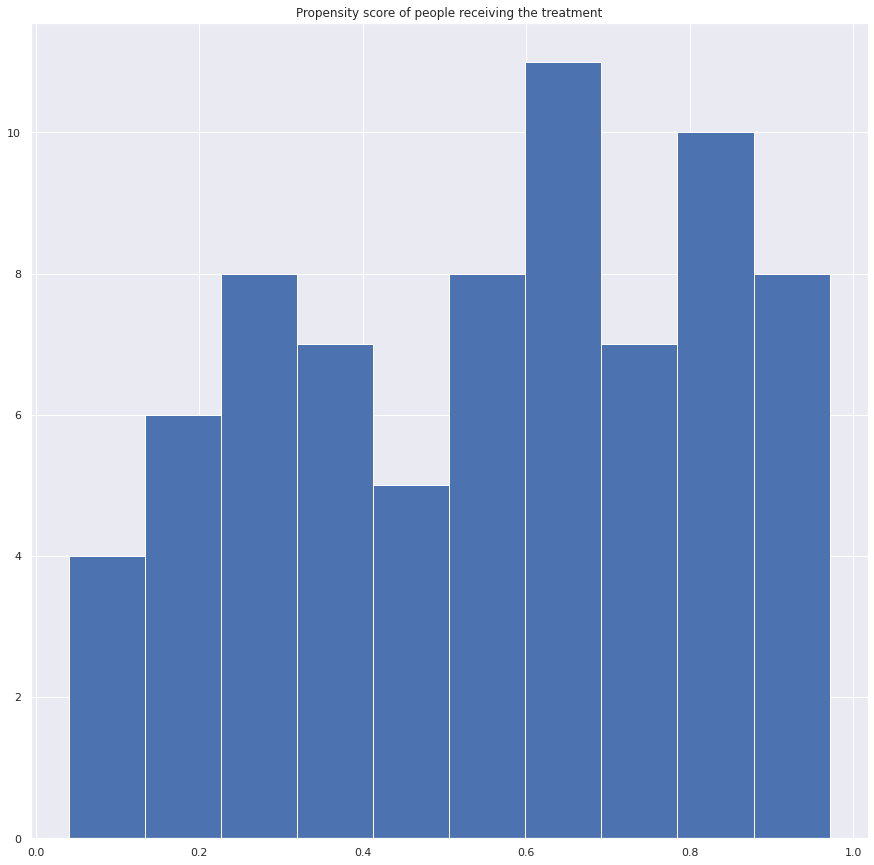

In [ ]:
plt.hist(df_pm_asthma_tobacco_11_14[df_pm_asthma_tobacco_11_14['treatment'] == 1]['pscore']);
plt.title("Propensity score of people receiving the treatment");

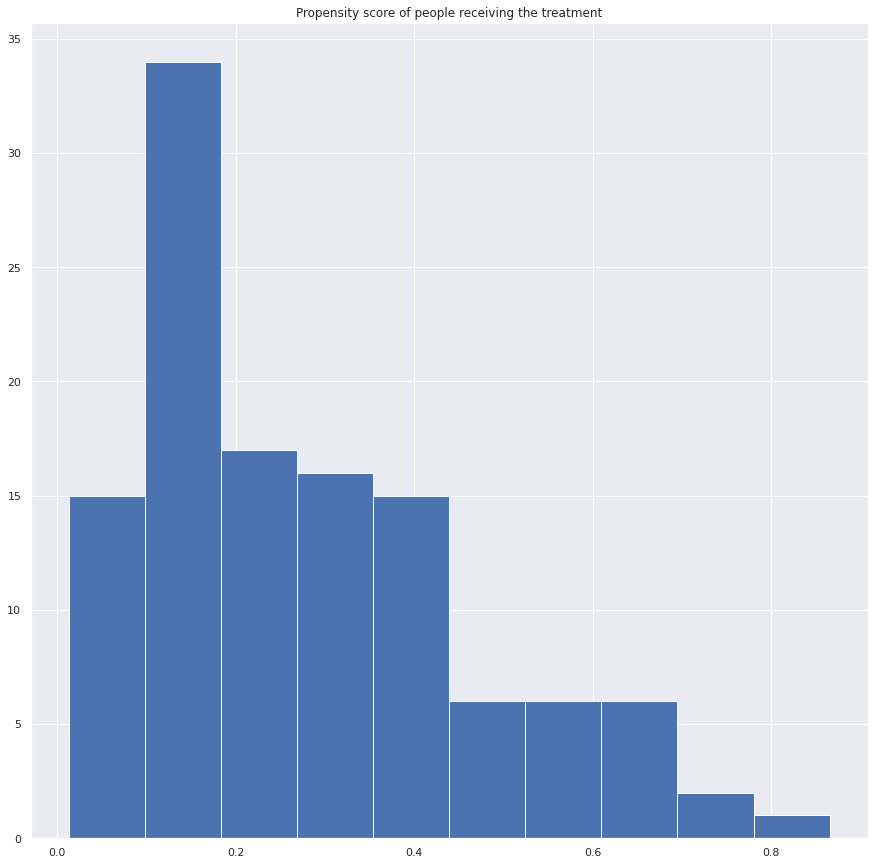

In [ ]:
plt.hist(df_pm_asthma_tobacco_11_14[df_pm_asthma_tobacco_11_14['treatment'] == 0]['pscore']);
plt.title("Propensity score of people receiving the treatment");

In [ ]:
p = df_pm_asthma_tobacco_11_14['pscore']
treatment = df_pm_asthma_tobacco_11_14[df_pm_asthma_tobacco_11_14['treatment'] == 1.0]['DataValueAlt_asthma'] / p
control = df_pm_asthma_tobacco_11_14[df_pm_asthma_tobacco_11_14['treatment'] == 0.0]['DataValueAlt_asthma'] / (1-p)